<a href="https://colab.research.google.com/github/matttmbn/DATA4AUDITORS_IAEMETZ/blob/main/PROJET_ANALYSE_SINA_TAMBURINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT PERFORMANCE ANALYSIS

##Comment le COVID-19 a t-il impacté les performances financières des entreprises pharmaceutiques ?

### Presenté par TAMBURINI Matt & SINA Mariam


In [ ]:
# ÉTAPE 1 : IMPORTATION DES LIBRAIRIES

# L'importation des librairies nécessaire pour la manipulation de données, la visualisation et le machine learning

import pandas as pd # manipulation des dataframes
import numpy as np # analyse de données
import matplotlib.pyplot as plt # package pour les graphiques
import seaborn as sns # package pour les visuels
import datetime as dt # manipulation des dates
!pip install yfinance
import yfinance as yf # pour l'importation de données à partir de yahoo finance
import plotly.express as px # package pour les graphiques intéractifs
import plotly.figure_factory as ff # package pour les graphiques intéractifs
from scipy.stats import shapiro, jarque_bera, norm,linregress # package pour les statistiques
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #evaluation metrics package

In [ ]:
# ÉTAPE 2 : CHARGEMENT DES DONNÉES

# Ici, on va télécharger les données historiques des actions de 5 entreprises pharmaceutiques et du benchmark définis
# Pfizer, Moderna, Johnson & Johnson, AstraZeneca, BioNTech, The Health Care Select Sector SPDR Fund (Benchmark)
Stocks = ["PFE","MRNA","JNJ","AZN","BNTX","XLV"]
start_date = "2020-01-01" # date de départ
end_date = "2025-01-01" # date de fin

# Télécharger les données historiques
data = yf.download(Stocks, start=start_date, end=end_date,auto_adjust=False)
display(data.head())

[*********************100%***********************]  6 of 6 completed


Price       Adj Close                                                          \
Ticker            AZN       BNTX         JNJ       MRNA        PFE        XLV   
Date                                                                            
2020-01-02  44.017033  37.996727  126.055191  19.230000  29.490604  94.315811   
2020-01-03  43.754971  39.526466  124.595741  18.889999  29.332371  93.493896   
2020-01-06  43.571533  43.997250  124.440331  18.129999  29.294701  94.075729   
2020-01-07  43.737499  42.773460  125.200195  17.780001  29.196747  93.890999   
2020-01-08  43.632683  44.510452  125.182968  17.980000  29.430330  94.500504   

Price           Close                                    ...        Open  \
Ticker            AZN       BNTX         JNJ       MRNA  ...         JNJ   
Date                                                     ...               
2020-01-02  50.389999  38.500000  145.970001  19.230000  ...  145.869995   
2020-01-03  50.090000  40.049999  144.279999  18.889999  ...  143.500000   
2020-01-06  49.880001  44.580002  144.100006  18.129999  ...  144.000000   
2020-01-07  50.070000  43.340000  144.979996  17.780001  ...  144.009995   
2020-01-08  49.950001  45.099998  144.960007  17.980000  ...  144.869995   

Price                                          Volume                   \
Ticker           MRNA        PFE         XLV      AZN    BNTX      JNJ   
Date                                                                     
2020-01-02  19.570000  37.286530  102.169998  3587300  139500  5777000   
2020-01-03  19.020000  36.736244  100.949997  1208700  176000  5752400   
2020-01-06  18.700001  36.831120  100.779999  1992300  333300  7731300   
2020-01-07  18.150000  37.115749  101.589996  1871900  562100  7382900   
2020-01-08  17.990000  36.774193  101.720001  1869000  193900  6605800   

Price                                   
Ticker         MRNA       PFE      XLV  
Date                                    
2020-01-02  1233600  16514072  6277400  
2020-01-03  1751000  14922848  8247500  
2020-01-06  1606500  15771951  6441800  
2020-01-07  1461400  20108107  6335300  
2020-01-08  1041600  16403507  7494700  

[5 rows x 36 columns]

In [ ]:
# ÉTAPE 3 : ANALYSE EXPLORATOIRE DES DONNÉES

# On sélectionne les prix de clôture ajustés
data_closing=data['Adj Close']

# On calcule les rendements quotidiens
DailyReturns = data_closing.pct_change()
display(DailyReturns)

# On calcule le rendement annuel moyen
annual_returns = DailyReturns.mean() * 252  # 252 est le nombre moyen de jours de bourse par an
print("Rendement annuel moyen : \n", annual_returns)

# On calcule la volatilité annuelle
volatility = DailyReturns.std() * np.sqrt(252)
print("Volatilité annuelle : \n", volatility)

Ticker,AZN,BNTX,JNJ,MRNA,PFE
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.005954,0.040260,-0.011578,-0.017681,-0.005366
2020-01-06,-0.004192,0.113109,-0.001247,-0.040233,-0.001284
2020-01-07,0.003809,-0.027815,0.006106,-0.019305,-0.003344
2020-01-08,-0.002396,0.040609,-0.000138,0.011249,0.008000
...,...,...,...,...,...
2024-12-24,-0.004953,0.005462,0.003993,0.017176,0.001123
2024-12-26,0.003318,-0.003154,-0.001851,0.003973,-0.006731
2024-12-27,-0.003909,0.001582,-0.003641,-0.007420,0.002259


Rendement annuel moyen : 
 Ticker
AZN     0.111543
BNTX    0.521191
JNJ     0.045193
MRNA    0.429530
PFE     0.013084
dtype: float64
Volatilité annuelle : 
 Ticker
AZN     0.262752
BNTX    0.793395
JNJ     0.196566
MRNA    0.747276
PFE     0.274724
dtype: float64


In [ ]:
# ÉTAPE 4 : NETTOYAGE DES DONNÉES

# Tout d'abord, on regarde si des données sont manquantes dans le dataframe
print(DailyReturns.isnull().sum())

# Ensuite, on supprime les lignes avec des données manquantes pour assurer l'intégrité des données
DailyReturns.dropna(inplace=True)
display(DailyReturns)

Ticker
AZN     1
BNTX    1
JNJ     1
MRNA    1
PFE     1
XLV     1
dtype: int64


Ticker,AZN,BNTX,JNJ,MRNA,PFE,XLV
Date,,,,,,
2020-01-03,-0.005954,0.040260,-0.011578,-0.017681,-0.005366,-0.008714
2020-01-06,-0.004192,0.113109,-0.001247,-0.040233,-0.001284,0.006223
2020-01-07,0.003809,-0.027815,0.006106,-0.019305,-0.003344,-0.001964
2020-01-08,-0.002396,0.040609,-0.000138,0.011249,0.008000,0.006492
2020-01-09,0.002603,-0.040576,0.002966,0.023359,-0.004352,0.004300
...,...,...,...,...,...,...
2024-12-24,-0.004953,0.005462,0.003993,0.017176,0.001123,0.004108
2024-12-26,0.003318,-0.003154,-0.001851,0.003973,-0.006731,0.002010
2024-12-27,-0.003909,0.001582,-0.003641,-0.007420,0.002259,-0.004656


<Figure size 1400x600 with 0 Axes>

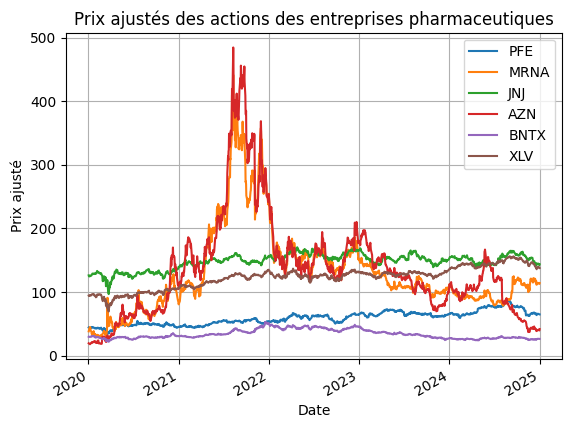

<Figure size 1200x600 with 0 Axes>

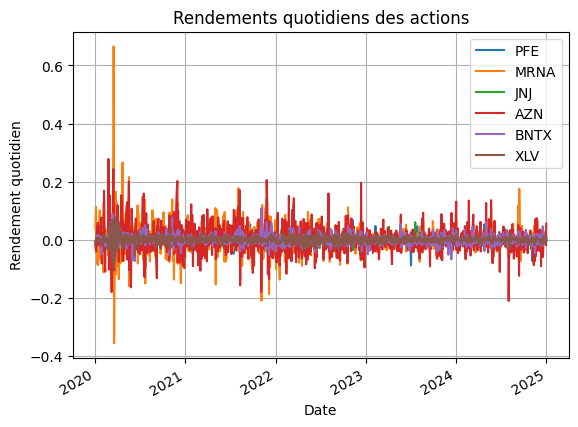

In [ ]:
# ÉTAPE 5 : VISUALISATION DES DONNÉES

# On créé un graphique pour visualiser les prix ajustés (clôture)
plt.figure(figsize=(14,6))
data['Adj Close'].plot()
plt.title('Prix ajustés des actions des entreprises pharmaceutiques')
plt.xlabel('Date')
plt.ylabel('Prix ajusté')
plt.legend(Stocks)
plt.grid(True)
plt.show()

# On créé un graphique isualiser les rendements quotidiens
plt.figure(figsize=(12, 6))
DailyReturns.plot()
plt.title('Rendements quotidiens des actions')
plt.xlabel('Date')
plt.ylabel('Rendement quotidien')
plt.legend(Stocks)
plt.grid(True)
plt.show()

In [ ]:
# ÉTAPE 6 : ÉTABLISSEMENT DES COMPARATIFS & RATIOS FINANCIERS

# On commence par définir un point de coupure : Mars 2020
start_pandemic = '2020-03-01'

# On divise les données avant et après le début de la pandémie
data_before = data.loc[data.index < start_pandemic]
data_after = data.loc[data.index >= start_pandemic]

# On calcule les rendements avant et après le début de la pandémie
returns_before = data_before['Adj Close'].pct_change().dropna()
returns_after = data_after['Adj Close'].pct_change().dropna()

# On calcule les rendements annuels moyens avant et après
avg_return_before = returns_before.mean() * 252
avg_return_after = returns_after.mean() * 252

print("Rendement annuel moyen avant la pandémie : \n", avg_return_before)
print("Rendement annuel moyen après la pandémie : \n", avg_return_after)

# On calcule le ratio de Sharpe avant et après le début de la pandémie
# On suppose un taux sans risque de 2% pour cette analyse
risk_free_rate = 0.02  # Par exemple, 2% comme taux sans risque

sharpe_before = (returns_before.mean() * 252 - risk_free_rate) / (returns_before.std() * np.sqrt(252))
sharpe_after = (returns_after.mean() * 252 - risk_free_rate) / (returns_after.std() * np.sqrt(252))

print(f"Ratio de Sharpe avant la pandémie: {sharpe_before}")
print(f"Ratio de Sharpe après la pandémie: {sharpe_after}")

# On calcule le drawdown maximum avant et après la pandémie
cumulative_returns_before = (1 + returns_before).cumprod()
cumulative_returns_after = (1 + returns_after).cumprod()

running_max_before = cumulative_returns_before.cummax()
running_max_after = cumulative_returns_after.cummax()

drawdown_before = (cumulative_returns_before - running_max_before) / running_max_before
drawdown_after = (cumulative_returns_after - running_max_after) / running_max_after

max_drawdown_before = drawdown_before.min()
max_drawdown_after = drawdown_after.min()

print(f"Drawdown maximal avant la pandémie : {max_drawdown_before}")
print(f"Drawdown maximal après la pandémie : {max_drawdown_after}")

Rendement annuel moyen avant la pandémie : 
 Ticker
AZN    -0.744206
BNTX   -0.166244
JNJ    -0.475450
MRNA    2.582441
PFE    -0.928359
XLV    -0.614583
dtype: float64
Rendement annuel moyen après la pandémie : 
 Ticker
AZN     0.129272
BNTX    0.534800
JNJ     0.053385
MRNA    0.329348
PFE     0.034219
XLV     0.105555
dtype: float64
Ratio de Sharpe avant la pandémie: Ticker
AZN    -3.101319
BNTX   -0.197381
JNJ    -3.078480
MRNA    2.138500
PFE    -4.208861
XLV    -3.427165
dtype: float64
Ratio de Sharpe après la pandémie: Ticker
AZN     0.416405
BNTX    0.652768
JNJ     0.169668
MRNA    0.426296
PFE     0.051624
XLV     0.469838
dtype: float64
Drawdown maximal avant la pandémie : Ticker
AZN    -0.129310
BNTX   -0.352328
JNJ    -0.121128
MRNA   -0.229175
PFE    -0.170686
XLV    -0.115726
dtype: float64
Drawdown maximal après la pandémie : Ticker
AZN    -0.278704
BNTX   -0.822467
JNJ    -0.225397
MRNA   -0.923938
PFE    -0.548180
XLV    -0.250103
dtype: float64


In [ ]:
# On créé un DataFrame récapitulatif

performance = pd.DataFrame({
    'Rendement Annuel Moyen Avant COVID': avg_return_before,
    'Rendement Annuel Moyen Après COVID': avg_return_after,
    'Volatilité Avant COVID': returns_before.std() * np.sqrt(252),
    'Volatilité Après COVID': returns_after.std() * np.sqrt(252),
    'Ratio de Sharpe Avant COVID': sharpe_before,
    'Ratio de Sharpe Après COVID': sharpe_after,
    'Drawdown Maximum Avant COVID': max_drawdown_before,
    'Drawdown Maximum Après COVID': max_drawdown_after
})
display(performance)

,Rendement Annuel Moyen Avant COVID,Rendement Annuel Moyen Après COVID,Volatilité Avant COVID,Volatilité Après COVID,Ratio de Sharpe Avant COVID,Ratio de Sharpe Après COVID,Drawdown Maximum Avant COVID,Drawdown Maximum Après COVID
Ticker,,,,,,,,
AZN,-0.744206,0.129272,0.246413,0.262418,-3.101319,0.416405,-0.129310,-0.278704
BNTX,-0.166244,0.534800,0.943575,0.788642,-0.197381,0.652768,-0.352328,-0.822467
JNJ,-0.475450,0.053385,0.160940,0.196764,-3.078480,0.169668,-0.121128,-0.225397
MRNA,2.582441,0.329348,1.198243,0.725665,2.138500,0.426296,-0.229175,-0.923938
PFE,-0.928359,0.034219,0.225324,0.275428,-4.208861,0.051624,-0.170686,-0.548180
XLV,-0.614583,0.105555,0.185163,0.182094,-3.427165,0.469838,-0.115726,-0.250103
